# 第四章 跳过运营数据分析和挖掘的“大坑”

经历了前几章的环节之后，在数据分析和挖掘的过程中，经常会遇到一些难以理解的问题和困惑，面对这些问题，这章将展开讨论，内容涵盖了聚类、回归、分类、关联、异常检测、时间序列、路径分析、漏斗分析、归因分析、热力图分析以及其他的统计分析相关话题，针对部分话题将进行Python代码实操，以加深理解。

## 4.1 聚类分析

**聚类**是数据挖掘和计算的基本任务，是将大量数据集中具有“相似”特征的数据点或者样本划分为一个类别。其基本思想是“物以类聚，人以群分”，因此大量的数据集中必然存在相似的数据样本，基于这个思想将数据区分开来，并发现不同类的特征。

聚类常用语数据探索或挖掘的前期，在没有进行先验经验的背景下进行探索性分析（EDA），也适用于样本量较大情况下的数据预处理工作。

常用的聚类算法分为基于划分、层次、密度、网络、统计学、模型等类型的算法。典型算法包括K均值、DBSCAN、两步聚类、BIRCH、谱聚类等。

聚类分析能解决的问题包括：

* 数据集可以分为几类
* 每个类别有多少样本量
* 不同类别中各个变量的强弱关系如何
* 不同类别的典型特征是什么
* 基于类别划分的其他应用

但是聚类的缺点是无法提供明确的行动指向，更多的是为后期数据挖掘和分析提供预处理和参考，因此聚类无法真正解决问题。

### 4.1.1 当心数据异常对聚类结果的影响

K-均值是聚类中最常用的方法之一，它基于点与点之间距离的相似度来计算最佳类别归属，但是在应用它之前要注意两种数据异常：

1. 数据的异常值：异常值可能会导致不同点之间的剧烈相似度放生改变，而且是隐蔽的；
2. 数据的异常量纲：不同的维度与变量之间，如果存在数值规模或量纲差异，在进行距离计算之间一定要将变量归一化或者标准化。

如果上述两个限制无法避免，可以尝试使用基于密度的聚类方法 --- DBSCAN。

DBSCAM全程Density-Based Spatial Clustering of Applications with Noise, 基于密度的带有噪声的空间聚类。该方法的出发点是基于密度寻找被低密度区域划分的高密度空间，以此来实现不同数据样本的聚类。和K-均值相比，该方法的有点是：

* 对原始数据集的分布规律无明显要求，能够适应任意数据集分布形状的空间聚类，因此数据集适用性更广，尤其是对非凸装、圆环形等异性簇分布的识别较好；
* 无需指定聚类数量，对结果的先验要求不高；
* 由于DNSCAN可区分核心对象、边界点和噪声点，因此对噪声的过滤效果好，能有效应对数据噪声。

但是，该方法是直接对整个数据样本集进行操作且聚类时使用了一个全局性的表征密度的参数，因此存在如下弱点：

* 对于高维问题，基于Eps（半径）、MinPts（密度）的定义是个大问题；
* 当簇的密度变化太大时，聚类结果较差；
* 当数据量较大时，要求较大的内存支持，I/O消耗也较大。

### 4.1.2 超大数据量时应该放弃K-均值算法

K-均值算法稳定、效率和准确率也表现很好，并且在应对大量数据时依然较好。其算法时间复杂度上界为`O(n*k*t)`，其中n是样本量、k是划分的聚类数、t是迭代次数。当聚类数和迭代数不变时，K-均值的算法消耗时间只跟样本量有关，呈现线性增长趋势。

当需要处理超大数据量的时候用，可以使用MinBatchKMeans，一种加入了分批处理思想的K-均值计算法，对数据集进行分批处理，减少运行时间，但是会降低准确度的下降。

### 4.1.3 聚类不仅是建模的重点，更是重要的中间预处理过程

聚类分析的结果提供了样本集在非监督模式下的类别划分，不经可以做群类别间的差异特征分析、群类别内的关键特征提取、样本群划分等分析，还能用于数据预处理的中间过程。

#### 1. 图像压缩

图像压缩时用较少的数据量来表示原有的像素矩阵的过程，该过程称为图像编码，但是数字图像的数据量庞大，需要占用很大的存储空间，给存储、计算、传输等带来不小的资源消耗，因此会预先对数字图像进行压缩，压缩的方法之一就是聚类算法。

#### 2. 图像分割

图像分割就是将图像分成若干个特定的、具有独特性的区域并提出感兴趣的目标的技术和过程，分割后提取出的目标可以用于图像语义识别、图像搜索等领域。聚类是图像分割的方法之一。

#### 3. 图像理解

传统的图像理解大多借助于浅层的视觉特征，例如颜色、形状、纹理、轮廓等，而图像理解就是从图像中获取更加深层的信息，即包含图像中存在的对象以及对象间的空间关系，也包含对隐含在图像背后的概念和内容进行探究。图像理解中，比较常用的是基于区域的提取方法，即在图像分割和对象识别的前提下进行，利用对象模板、场景分类器等，通过识别对象以及对象之间的拓扑关系挖掘语义，生成对应的场景语义信息。

#### 4. 异常检测

聚类也是进行异常检测的方法之一，常用的便是基于距离的异常检测方法，该方法包含并拓展了基于统计的思想，即使数据集不满足任何特定分布模型，仍能有小弟发现离群点，特别是当空间维度数目较高时，算法的效率比基于密度的高很多。

#### 5. 数据离散化

聚类也可以进行数据离散化的处理。在第三章第10部分第3小节已经有介绍。


### 4.1.4 高维数据上无法应用聚类吗

在大数据背景下，数据获取难度和成本愈来愈低，很多高维数据场景下进行聚类时，传统的在低维空间通用的聚类方法，通常不能取得令人满意的聚类结果，主要表现在聚类计算耗时长、结果相对于真实标签分类的准确度和稳定性大大降低。

主要的原因如下：

* 在面对高维度数据时，基于距离的相似度计算效率极低；
* 高维空间的大量属性特征是的在所有维度上存在簇的可能性非常低；
* 由于稀疏性和近邻特性，基于距离的相似度几乎都为0，导致高维度空间中很难存在数据簇

在应对高维度数据聚类问题时，可以使用下面2中方法解决：

1. 降维：通过特征选择发或者维度转换法将高维空间降低到低维空间，直接解决高维度问题；
2. 子空间聚类：在高维度空间中选取与给定簇密切相关的维度，然后在对应的子空间进行聚类。

### 4.1.5 如何选择聚类分析算法

在选择聚类算法的时候，可以参考如下因素：

* 如果数据集是高维度的，那么选择谱聚类，是子空间划分的一种，但是操作难度较高；
* 如果数据为中小规模，100万以内，那么K-均值将是比较好的选择，如果超过100万，可以考虑使用MiniBatchKMeans；
* 如果数据中有噪点（离群点），使用基于密度的DBSCAN可以有效应对；
* 如果追求更高的分类准确度，选择谱聚类法比K-均值更好。

### 4.1.6 代码实操：Python聚类分析

SKLean中有专门的聚类库：cluster，其包含了很多的聚类算法。

本例将使用一份无标签的数据集做聚类分析，以得到不同类别的特征和分布状态等。

In [1]:
# 导入库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [40]:
# 数据准备
raw_data = np.loadtxt('cluster.txt')
X = raw_data[:, :-1]
y = raw_data[:, -1]

X[0]

array([0.58057881, 0.43199283])

In [8]:
# 训练聚类模型

# 设置聚类数量
n_cluster = 3
# 建立聚类模型对象
model_kmeans = KMeans(n_clusters=n_cluster, random_state=0)
# 训练聚类模型
model_kmeans.fit(X)
# 预测聚类模型
y_pred = model_kmeans.predict(X)

model_kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [22]:
# 模型效果指标评估

# 总样本量、总特征数
n_samples, n_features = X.shape
# 样本距离最近的聚类中心的总和
inertias = model_kmeans.inertia_
# 调整后的兰德指数
adjusted_rand_s = metrics.adjusted_rand_score(y, y_pred)
# 互信息
mutual_info_s = metrics.mutual_info_score(y, y_pred)
# 调整后的互信息
adjusted_mutual_info_s = metrics.adjusted_mutual_info_score(y, y_pred)

# 同质化得分
homogeneity_s = metrics.homogeneity_score(y, y_pred)
# 完整性得分
completeness_s = metrics.completeness_score(y, y_pred)
# V_measure得分
v_measure_s = metrics.v_measure_score(y, y_pred)
# 平均轮廓系数
silhouette_s = metrics.silhouette_score(X, y_pred, metric='euclidean')
# Calinski和Harabaz得分
calinski_harabaz_s = metrics.calinski_harabaz_score(X, y_pred)

In [23]:
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('ine\tARI\tMI\tAMI\thomo\tcomp\tv_m\tsilh\tc&h')  # 打印输出指标标题
print ('%d\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%.2f\t%d' % (
inertias, adjusted_rand_s, mutual_info_s, adjusted_mutual_info_s, homogeneity_s, completeness_s, v_measure_s,
silhouette_s, calinski_harabaz_s))  # 打印输出指标值
print (70 * '-')  # 打印分隔线


print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ine \t inertias')
print ('ARI \t adjusted_rand_s')
print ('MI \t mutual_info_s')
print ('AMI \t adjusted_mutual_info_s')
print ('homo \t homogeneity_s')
print ('comp \t completeness_s')
print ('v_m \t v_measure_s')
print ('silh \t silhouette_s')
print ('c&h \t calinski_harabaz_s')

samples: 1000 	 features: 2
----------------------------------------------------------------------
ine	ARI	MI	AMI	homo	comp	v_m	silh	c&h
300	0.96	1.03	0.94	0.94	0.94	0.94	0.63	2860
----------------------------------------------------------------------
short name 	 full name
ine 	 inertias
ARI 	 adjusted_rand_s
MI 	 mutual_info_s
AMI 	 adjusted_mutual_info_s
homo 	 homogeneity_s
comp 	 completeness_s
v_m 	 v_measure_s
silh 	 silhouette_s
c&h 	 calinski_harabaz_s


聚类算法的评级指标：[Evaluation of Clustering](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)

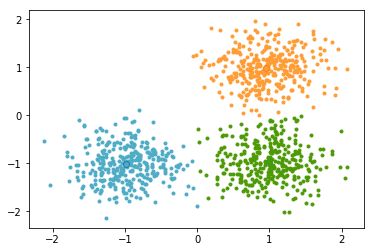

In [26]:
# 模型效果可视化

# 各类别中心
centers = model_kmeans.cluster_centers_
# 设置不同类别的颜色
colors = ['#4EACC5', '#FF9C34', '#4E9A06']
# 建立画布
plt.figure()
# 循环读取类别
for i in range(n_cluster):
    # 找到相同类别的索引集合
    index_sets = np.where(y_pred == i)
    # 将相同类别的数据划分为一个聚类子集
    cluster = X[index_sets]
    # 展示聚类子集内的样本
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], marker='.')
    # 展示聚类子集的中心
    plt.plot(centers[i][0], centers[i][1], 'o', markerfacecolor = colors[i])
plt.show()

In [42]:
# 模型应用
new_X = np.array([[1, 3.6]])
cluster_label = model_kmeans.predict(new_X)
print('cluster of new data point is: %d' % cluster_label)

cluster of new data point is: 1


对于聚类模型结果的评估，主要考虑如下三个方面：

1. 对于没有任何聚类真实结果指标的，由于无法使用真实数据做对比，智能使用聚类距离指标做评估；
2. 对于有分类真实结果做对照的，则可以使用真实标签与预测标签的相似、重复、完整性等度量计算，但是需要注意的是，聚类结果的标签值与其真实类别的标签值没有关系，结果只关注数据点是否属于同一类；
3. 业务类的评估，包括不同类别间的特征是否有显著差异，类内部是否具有能代表类别的显著性特征。

## 4.2 回归分析

回归是一种研究自变量x对因变量y影响的数据分析方法，最简单的回归模型是一元线性回归，可以表示为 `Y = β0 + β1 * x + ε`，Y为因变量，x为自变量，β1为影响系数，β0为截距，ε为随机误差因子。

常用的回归算法包括线性回归、二项式回归、对数回归、指数回归、核SVM、岭回归、Lasso等。

回归的优点是数据模式和结果便于理解；在基于函数公式的业务应用中，可直接使用代入法求解。
回归的缺点是只能分析少量变量之间的相互关系，无法处理海量变量间的相互作用关系。

### 4.2.1 注意回归自变量之间的共线性问题

在应用回归模型时，应注意识别和解决自变量间的共线性问题。在第三章第7节已有介绍。

### 4.2.2 相关系数、判定系数和回归系数之间的关系

例：y = 42.738x + 169.94，其中R² = 0.5252，对两个变量进行相关性分析，得到相关系数R = 0.7246。其中42.738是自变量x的回归系数，0.5252是该方程的判定系数，0.7246是两个变量之间的相关性系数。

* 回归系数：在回归方程中表示自变量x对因变量y影响大小的参数，其绝对值的高低智能说明自变量和因变量之间的联系程度和变化量的比例；
* 判定系数：是自变量对因变量的方差解释程度的值，计算公式为：回归平方和与总离差平方和之比值；
* 相关系数：也称为解释系数，是衡量变量之间的相关程度或者密切程度的值，其本质是线性相关性的判断。

三者的相互关系：

* 判定系数是所有参与模型与模型中自变量的对因变量联合影响程度，而非某个自变量的影响程度。

回归系数与相关系数的关系：回归系数 > 0，相关系数取值在(0, 1]，说明二者正相关，如果系数小于0，相关系数取值在(-1, 0)，说明二者负相关。

### 4.2.3 判定系数是否意味着相应的因果关系

相关性和因果并不是一回事，相应的判定系数和因果也不是一回事。以一元线性回归方程为例：

* 判定系数是相关系数的平方，相关系数不是因果，但是其平方后就能成为因果。（为什么？）
* 判定系数的出发点是用来评估整个模型的拟合优度，就是自变量引起的变动占总变动的百分比。但是如果两者有相同的变动趋势，也不意味着因果关系。

### 4.2.4 注意应用回归模型时研究自变量是否产生变化

在应用回归模型预测时，必须研究对因变量产生影响的自变量是否产生变化，主要考察两个方面：

1. 是否有产生了新的对因变量影响更大的自变量
2. 原有自变量是否依然控制在训练模型时的范围之内

### 4.2.5 如何选择回归分析算法

回归算法按照自变量的个数分为一元回归和多元回归，按照影响是否线性分为线性回归和非线性回归。在面对不同回归方法的选择，需要参考如下因素：

* 入门的开始 --- 简单线性回归。如果以学习为主，不需要选择多么强大的模型，基于最小二乘法的普通线性回归最为合适，同时，适合数据集本身结构简单，分布规律有明显线性关系的场景；
* 如果自变量数量小或者经过降维后得到了可以使用的二维变量，那么可以直接通过散点图发现自变量和因变量的相关关系，然后选择最佳回归方法；
* 如果经过基本判断发现自变量之间有较强的共线性关系，那么可以使用对多重共线性能灵活处理的算法，例如岭回归；
* 如果数据集噪声较多，推荐使用主成分回归，主成分分析通过对参与回归的主成分合理选择，可以去噪；
* 如果在高维度变量下，使用正则化回顾方法效果较好或者使用逐步回归从中挑选影响显著的自变量来建立回归模型；
* 如果要同时验证多个算法，并想从中选择一个来做好的拟合，使用交叉验证做多个模型的效果对比，并通过R-square、Adjusted R-square、AIC、BIC以及各种残差、误差项指标做综合评估；
* 如果注重模型的可解释型，那么容易理解的线性回归、指数回归、对数回归、二项式或多项式回归要比核回归、支持向量回归机更适合；
* 集成或组合回归方法。一单确认了几个方法，但又不确定如何取舍时，可以将多个回归模型做成集成或组合方法使用，即同时将多个模型的结果通过加权、均值等方式确定最终输出结果值。

### 4.2.6 代码实操：Python回归分析

本实操是针对一批训练集做多个回归模型训练和评估，从中选择效果较好的模型并对新数据集做回归预测。

In [46]:
# 导入库
import numpy as np
# 导入要实现的回归算法
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet
# SVM中的回归算法
from sklearn.svm import SVR
# 集成算法
from sklearn.ensemble.gradient_boosting import  GradientBoostingRegressor
# 交叉验证
from sklearn.model_selection import cross_val_score
# 导入指标算法
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import matplotlib.pyplot as plt

In [47]:
# 数据准备
raw_data = np.loadtxt('regression.txt')
X = raw_data[:, :-1]
y = raw_data[:, -1]

X.shape

(506, 13)

In [51]:
# 训练回归模型

# 设置交叉验证次数
n_folds = 6
# 建立贝叶斯回归模型对象
model_br = BayesianRidge()
# 建立普通线性回归模型对象
model_lr = LinearRegression()
# 建立弹性网络回归模型对象
model_etc = ElasticNet()
# 建立支持向量机回归模型对象
model_svr = SVR()
# 建立梯度增强回归模型对象
model_gbr = GradientBoostingRegressor()

# 不同模型的名称列表
model_names = ['BayesuabRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']
# 不同回归模型对象组合
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr]
# 交叉验证结果列表
cv_score_list = []
# 各个回归模型预测的y值列表
pred_y_list = []

#读取每个回归模型
for model in model_dic:
    # 将每个回归模型导入交叉验证模型中做训练检验
    scores = cross_val_score(model, X, y, cv = n_folds)
    # 将交叉验证结果存储结果列表
    cv_score_list.append(scores)
    # 将回归训练中得到的预测y存储列表
    pred_y_list.append(model.fit(X, y).predict(X))
    
# 模型效果指标评估

# 总样本量、总特征数
n_samples, n_features = X.shape
# 回归评估指标对象集
mdoel_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]
# 回归评估指标列表
model_metrics_list = []

# 循环每个模型索引
for i in range(5):
    # 每个内循环的临时结果列表
    tmp_list = []
    # 循环每个指标对象
    for m in mdoel_metrics_name:
        # 计算每个回归指标结果
        tmp_score = m(y, pred_y_list[i])
        # 将结果存储每个内循环的临时结果列表
        tmp_list.append(tmp_score)
    # 将结果存储回归评估指标列表
    model_metrics_list.append(tmp_list)

df1 = pd.DataFrame(cv_score_list, index=model_names)
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])

In [52]:
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线

samples: 506 	 features: 13
----------------------------------------------------------------------
cross validation result:
                         0         1         2         3         4         5
BayesuabRidge     0.662422  0.677079  0.549702  0.776896 -0.139738 -0.024448
LinearRegression  0.642240  0.611521  0.514471  0.785033 -0.143673 -0.015390
ElasticNet        0.582476  0.603773  0.365912  0.625645  0.437122  0.200454
SVR              -0.000799 -0.004447 -1.224386 -0.663773 -0.122252 -1.374062
GBR               0.751185  0.774480  0.767391  0.861102  0.373970  0.558588
----------------------------------------------------------------------
regression metrics:
                        ev       mas        mse        r2
BayesuabRidge     0.731143  3.319204  22.696772  0.731143
LinearRegression  0.740608  3.272945  21.897779  0.740608
ElasticNet        0.686094  3.592915  26.499828  0.686094
SVR               0.173548  5.447960  71.637552  0.151410
GBR               0.975126  1.151

* **explained_variance**： 解释回归模型的方差得分，取值范围[0，1]，值越小效果越差；
* **mean_absolute_error**：平均绝对误差（Mean Absolute Error, MAE）, 评估预测结果和真实结果接近程度，值越小拟合效果越好；
* **mean_squared_error**：均方差（Mean Squared Error， MSE），拟合数据和原始数据对应样本点的误差的平方和和均值，值越小效果越好；
* **r2-score**：判定系数，值越小效果越差

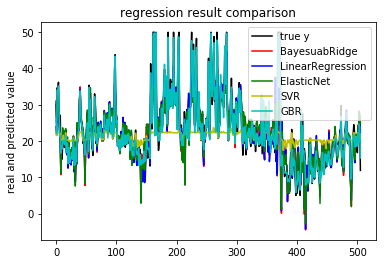

In [54]:
# 模型效果可视化
plt.figure()  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pred_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), pred_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [55]:
# 模型应用
print ('regression prediction')
new_point_set = [[1.05393, 0., 8.14, 0., 0.538, 5.935, 29.3, 4.4986, 4., 307., 21., 386.85, 6.58],
                 [0.7842, 0., 8.14, 0., 0.538, 5.99, 81.7, 4.2579, 4., 307., 21., 386.75, 14.67],
                 [0.80271, 0., 8.14, 0., 0.538, 5.456, 36.6, 3.7965, 4., 307., 21., 288.99, 11.69],
                 [0.7258, 0., 8.14, 0., 0.538, 5.727, 69.5, 3.7965, 4., 307., 21., 390.95, 11.28]]  # 要预测的新数据集
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    new_pre_y = model_gbr.predict(np.array(new_point).reshape(1,-1))  # 使用GBR进行预测
    print ('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息

regression prediction
predict for new point 1 is:  21.49
predict for new point 2 is:  16.84
predict for new point 3 is:  19.50
predict for new point 4 is:  19.16


## 4.3 分类分析

分类算法是通过对已知类别训练集的计算和分析，从中发现类别规则并预测新数据的类别，是解决分类问题的方法，是数据挖掘、机器学习和模式识别中一个重要的研究领域。

常用的分类算法包括朴素贝叶斯、逻辑回归、决策树、随机森林、支持向量机等。

分类的主要用途和场景是“预测”，基于已有的样本预测新样本的所属类别；也可以用于知识抽取，通过模型找到潜在的规律，帮助业务得到可执行的规则。

### 4.3.1 防止分类模型的过拟合问题

过拟合就是在做分类训练时模型由于过度学习了训练集的特征，使得训练集的准确率非常高，但将模型应用到新的数据集时准确率却很差。因此防止过拟合是分类问题的一个重要任务。在分类算法中，尤其决策树容易出现过拟合的问题，可以使用如下的途径来避免过拟合问题：

* 使用更多的数据：导致过拟合的根本原因是训练集和新数据集的特征存在较大差异，导致原本完美拟合的模型无法对新数据集产生良好效果，通过增加数据集，可能会增加训练集和新数据集的特征相似度，从而降低过拟合的风险；
* 数据降维：通过降维选择或转换的方式，降低参与分类模型的维度数量，防止原有数据集中的“噪声”对模型的影响；
* 使用正则化方法：通过定义不同特征的参数来保证每个特征由一定的效用，不会是某一特征特别重要；
* 使用组合方法：例如随机森林、adaboost不容易产生过拟合的问题。

### 4.3.2 使用关联算法做分类分析

在关联算法中，会得到不同的关联规则，或称为频繁规则，这种模式一般用来做关联模式挖掘，转换思路后也可以用做分类分析。

使用关联逻辑并结合支持度、置信度和提升度可以找到分类信息，实现思路如下：

* 从数据集中选择属性特征+目标（可能是商品、广告、内容等），使用关联规则得到频繁项集，频繁项集的前、后项分别是属性（可以是单个或多个属性）和目标；
* 从得到的频繁集中，根据支持度、置信度、提升度定义出具有显著性的规则，例如置信度大于75%，支持度大于45%，提升度大于1等；
* 基于提取出来的前后项规则梳理出可用于分类规则以及对应的目标信息，该目标可以是多分类的

### 4.3.3 用分类分析来提炼规则、提取变量、处理缺失值

**1. 分类分析用于提炼应用规则**

预测是分类任务的主要应用方向，但将分类用于提炼应用规则，为数据化运营提供规则支持也是其重点应用之一，这种应用相对于其他算法更加具有落地的价值。常见的应用场景包括：

* 要针对沉默会员做会员重新激活，应该挑选具有什么特征的会员？
* 商品A库存积压严重，现在要通过促销活动清仓，选择哪些类型的促销活动更容易实现该目标？
* 网站需要大流量广告位来满足VIP商家的精准广告投放，具有哪些特征的广告位更符合VIP商家的客户需求？

从分类算法中提炼特征规则，利用的是在构建算法过程中的分类规则。例如决策树算法，分裂节点是表示局部最优值的显著性特征值，每个节点下的特征变量以及对应的值的组合即构成了规则。

**2. 分类分析用于提取变量特征**

从大量的输入变量中获得变量的重要性特征，然后提取权重较高的几个特征是分类分析的重点应用之一，此类方式也是数据归约和数据降维的重要方式。思路是：获取原始数据集并对数据进行预处理，将预处理的数据集放到分类算法中进行训练，然后从算法模型中提取特征权重信息。

**3. 分类分析用于处理缺失值**

前面已经了解到补全缺失值的方法之一就是模型法，基于现有的其他字段，将缺失字段作为目标变量进行预测，从而得到较为可能的补全值，如果缺失值是分类变量，则使用分类模型补全。

### 4.3.4 类别划分---分类算法和聚类算法都是好手

聚类和分类的区别：

1. 学习方式不同：聚类时一种非监督式学习算法，而分类是监督式学习算法；
2. 对源数据集要求不同：聚类不要求源数据集有预先定义的标签，而分类需要标签作为监督学习的“标准”或“参照”用来训练模型；
3. 应用场景不同：聚类一般应用于做数据探索性分析、数据降维、数据压缩等探索性、过程性分析和处理，而分类更多用于预测性分析和使用；
4. 解读结果不同：聚类算法的结果是将不同的数据集按照各自的典型特征分成不同类别，不同人对聚类的结果解读可能不同，而分类的结果却是一个固定值，不存在不同解读的情况；
5. 模型评估指标不同：聚类分析没有所谓的“准确”与否，以及如何准确的相关度量，更多的是基于距离的度量，如果是对带有标签的数据集做聚类则可以做相似度，完整度等方面的评估，而分类模型的指标例如准确率、混淆矩阵、提升率等都有明显的好坏、提升程度等评估指标。

### 4.3.5 如何选择分类分析算法

如何根据不同场景选择最合适的分类算法？

* 文本分类时，用到最多的是朴素贝叶斯；
* 如果训练集比较小，选择高偏差且低方差的分类算法效果更好，例如朴素贝叶斯、支持向量机等；
* 如果训练集比较大，那么不管选择哪种方法，都不会显著影响分类准确度；
* 如果关注的是算法模型的计算时间和模型易用性，那么选择支持向量机、人工神经网络不是好的选择；
* 如果重视算法的准确率，那么选择算法精度较高的方法，例如随机森林、支持向量机等；
* 如果想得到有关预测结果的概率信息，然后基于预测概率做进一步应用，使用逻辑回归是比较好的选择；
* 如果担心离群点或数据不可分，并且需要清晰地决策规则，那么选择决策树。

### 4.3.6 代码实操：Python分类分析

这里使用了prettytable和pydotplus图像和表格展示库以及配合pydotplus的GraphViz程序。安装方法如下：

```shell
pip install -U prettytable
pip install -U prdotplus
```

Mac下安装GraphViz程序可使用HomeBrew直接安装：

```shell
brew install graphviz
```

In [57]:
# 导入库
import numpy as np
# 数据分区库
from sklearn.model_selection import train_test_split
# 导入决策树库
from sklearn import tree
# 导入指标库
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
# 导入表格库
import prettytable
# 导入dot插件库
import pydotplus
# 导入图形展示库
import matplotlib.pyplot as plt

In [59]:
# 数据准备
raw_data = np.loadtxt('classification.csv', delimiter=',', skiprows=1)
X = raw_data[:, :-1]
y = raw_data[:, -1]

X.shape

(21927, 4)

In [63]:
# 将数据集分割为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)
X_train.shape
# y_train.shape

(15348, 4)

In [64]:
# 训练分类模型

# 建立决策树模型对象
model_tree = tree.DecisionTreeClassifier(random_state=0)
# 训练决策树模型
model_tree.fit(X_train, y_train)
model_tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [66]:
# 使用模型对测试机进行预测
pred_y = model_tree.predict(X_test)

In [67]:
# 输出模型概况
n_samples, n_features = X.shape  # 总样本量,总特征数
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线

samples: 21927 	 features: 4
----------------------------------------------------------------------


In [68]:
# 混淆矩阵
confusion_m = confusion_matrix(y_test, pred_y)
confusion_matrix_table = prettytable.PrettyTable()
confusion_matrix_table.add_row(confusion_m[0, :])
confusion_matrix_table.add_row(confusion_m[1, :])
print('confusion matrix')
print(confusion_matrix_table)

confusion matrix
+---------+---------+
| Field 1 | Field 2 |
+---------+---------+
|   5617  |   282   |
|   321   |   359   |
+---------+---------+


In [70]:
# 核心评估指标
y_score = model_tree.predict_proba(X_test)  # 获得决策树的预测概率
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])  # ROC
auc_s = auc(fpr, tpr)  # AUC
accuracy_s = accuracy_score(y_test, pred_y)  # 准确率
precision_s = precision_score(y_test, pred_y)  # 精确度
recall_s = recall_score(y_test, pred_y)  # 召回率
f1_s = f1_score(y_test, pred_y)  # F1得分
core_metrics = prettytable.PrettyTable()  # 创建表格实例
core_metrics.field_names = ['auc', 'accuracy', 'precision', 'recall', 'f1']  # 定义表格列名
core_metrics.add_row([auc_s, accuracy_s, precision_s, recall_s, f1_s])  # 增加数据
print ('core metrics')
print (core_metrics)  # 打印输出核心评估指标

core metrics
+--------------------+-------------------+--------------------+--------------------+--------------------+
|        auc         |      accuracy     |     precision      |       recall       |         f1         |
+--------------------+-------------------+--------------------+--------------------+--------------------+
| 0.7500443744203904 | 0.908344733242134 | 0.5600624024960998 | 0.5279411764705882 | 0.5435276305828918 |
+--------------------+-------------------+--------------------+--------------------+--------------------+


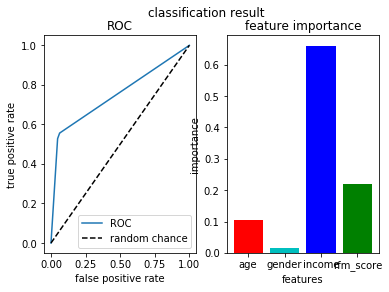

In [71]:
# 模型效果可视化
names_list = ['age', 'gender', 'income', 'rfm_score']  # 分类模型维度列表
color_list = ['r', 'c', 'b', 'g']  # 颜色列表
plt.figure()  # 创建画布
# 子网格1：ROC曲线
plt.subplot(1, 2, 1)  # 第一个子网格
plt.plot(fpr, tpr, label='ROC')  # 画出ROC曲线
plt.plot([0, 1], [0, 1], linestyle='--', color='k', label='random chance')  # 画出随机状态下的准确率线
plt.title('ROC')  # 子网格标题
plt.xlabel('false positive rate')  # X轴标题
plt.ylabel('true positive rate')  # y轴标题
plt.legend(loc=0)
# 子网格2：指标重要性
feature_importance = model_tree.feature_importances_  # 获得指标重要性
plt.subplot(1, 2, 2)  # 第二个子网格
plt.bar(np.arange(feature_importance.shape[0]), feature_importance, tick_label=names_list, color=color_list)  # 画出条形图
plt.title('feature importance')  # 子网格标题
plt.xlabel('features')  # x轴标题
plt.ylabel('importance')  # y轴标题
plt.suptitle('classification result')  # 图形总标题
plt.show()  # 展示图形

In [73]:
# 保存决策树规则图为PDF文件
dot_data = tree.export_graphviz(model_tree, out_file=None, max_depth=5, feature_names=names_list, filled=True,
                                rounded=True)  # 将决策树规则生成dot对象
graph = pydotplus.graph_from_dot_data(dot_data)  # 通过pydotplus将决策树规则解析为图形
graph.write_pdf("tree.pdf")  # 将决策树规则保存为PDF文件

True

In [74]:
# 模型应用
X_new = [[40, 0, 55616, 0], [17, 0, 55568, 0], [55, 1, 55932, 1]]
print ('classification prediction')
for i, data in enumerate(X_new):
    y_pre_new = model_tree.predict(np.array(data).reshape(1,-1))
    print ('classification for %d record is: %d' % (i + 1, y_pre_new))

classification prediction
classification for 1 record is: 0
classification for 2 record is: 0
classification for 3 record is: 1


## 4.4 关联分析

略

## 4.5 异常检测分析

数据集中的异常数据通常被认为是异常点、离群点或孤立点，特点是这些数据的特征与大多数数据不一致，呈现出“异常”的特点，检测这些数据的方法称为异常检测。

常用的异常检测方法分为基于统计的异常检测方法（如基于泊松分布、正态分布等分布规律找到异常分布点）、基于距离的异常检测方法（如基于K均值找到离所有分类最远的点）、基于密度的离群检测方法（LOF就是用于识别基于密度的局部异常值的算法）、基于偏移的异常点检测方法、基于时间序列的异常点检测方法等。

### 4.5.1 异常检测中的“新奇检测”模式

异常检测根据原始数据集的不同可分为：

**1. 离群点检测（Outlier Detection）**

训练数据集中包含“离群点”数据，大多数场景下所定义的异常数据都属于离群点数据。

**2. 新奇检测（Novelty Detection）**

新奇检测是识别新的或者未知的数据模式和规律的检测方法，这些规律和知识在已有的机器学习系统的训练集中没有被发掘出来。前提是已知训练数据集是“纯净”的，未被真正的“噪声”数据或者真实的“离群点”污染，然后针对这些数据训练完成后再对新的数据做训练以寻找新奇数据的模式。

### 4.5.2 将数据异常和业务异常相分离

数据异常反映的只是数据层面的离群分布，而这些离群分布未必是业务意义上的“异常”，也可能是业务特殊运营状态的反映。

### 4.5.3 面临维度灾难时，异常检测可能会失效

当原始数据中维度特别多时，普通的异常检测方法可能会失效，原因是随着维度的增加，数据之间的相似程度将严重受到维度数量的影响。

解决高维度空间下的异常检测问题，通常有三种思路：

1. 扩展现有的离群点检测模式
2. 发现子空间中的离群点
3. 对高维数据进行建模

### 4.5.4 异常检测的结果能说明异常吗

在进行异常检测分析时，输出的结果是用户是否异常的标签，例如1、-1，但是这种标签只是客观上基于数据相似度或者密度的识别结果，在业务上没有特殊动作导致“假异常”的前提下，是无法判断结果是否真的异常的。

在大多数场景下，通过非监督式方法实现的异常检测的结果只是用来缩小排查范围，为业务的执行提供更加精密和高效的执行目标而已。例如黄牛的识别任务中，通过多种算法做出异常检测结果会给出属于黄牛的信息列表，但是信息列表中的结果不一定符合实际情况，还需要业务介入做进一步的筛查和审核。

### 4.5.5 代码实操：Python异常检测分析

sklearn中提供了One-Class SVM 和EllipticEnvelope两种异常检测的方法，前者属于libsvm实现的非监督式异常检测方法，用于做高维度分布的评估；后者智能做基于高斯分布数据集的异常检测。

In [75]:
# 导入库
from sklearn.svm import OneClassSVM
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [76]:
# 数据准备
raw_data = np.loadtxt('outlier.txt', delimiter=' ')
train_set = raw_data[:900,:]
test_set = raw_data[:100, :]

print(train_set.shape, test_set.shape)

(900, 5) (100, 5)


In [79]:
# 异常数据检测
model_oneclasssvm = OneClassSVM(nu=0.1, kernel='rbf', random_state=0)
model_oneclasssvm.fit(train_set)
pred_test_outliers = model_oneclasssvm.predict(test_set)

print(model_oneclasssvm)
print('\n')
print(pred_test_outliers)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='auto', kernel='rbf',
      max_iter=-1, nu=0.1, random_state=0, shrinking=True, tol=0.001,
      verbose=False)


[-1  1  1  1 -1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1
  1 -1 -1  1]


In [83]:
# 异常结果统计

# 将测试集和检测结果合并
total_test_data = np.hstack((test_set, pred_test_outliers.reshape(test_set.shape[0], 1)))
# 获取检测结果中的正常数据
normal_test_data = total_test_data[total_test_data[:, -1] == 1]
# 获取检测结果中的异常数据
outlier_test_data = total_test_data[total_test_data[:, -1] == -1]
# 获得异常数据的结果数量
n_test_outliers = outlier_test_data.shape[1]
# 获取测试样本数量
total_count_test = total_test_data.shape[0]
# 输出异常的结果数量
print('outliers: {0}/{1}'.format(n_test_outliers, total_count_test))
print('{:*^60}'.format(' all result data (limit 5) '))
print(total_test_data[:5])

outliers: 6/100
**************** all result data (limit 5) *****************
[[ 0.03685295  0.0343899   0.09197858 -0.01026255 -0.00814121 -1.        ]
 [-0.0011522   0.02174971 -0.02040125  0.00986554 -0.03447136  1.        ]
 [-0.01258645  0.04736393  0.01110832 -0.01156876 -0.02334062  1.        ]
 [-0.02837847  0.04398011  0.00126378  0.02313849  0.00542565  1.        ]
 [ 0.02222529  0.00715191 -0.03713534 -0.02938668 -0.09915368 -1.        ]]


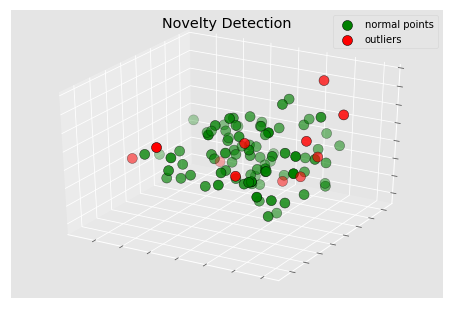

In [86]:
# 异常结果展示

# 使用ggplot样式库
plt.style.use('ggplot')
fig = plt.figure()
# 将画布抓换为3D类型
ax = Axes3D(fig)
s1 = ax.scatter(normal_test_data[:, 0], normal_test_data[:, 1], normal_test_data[:, 2], s = 100, edgecolors = 'k', c = 'g', marker= 'o')
s2 = ax.scatter(outlier_test_data[:, 0], outlier_test_data[:, 1], outlier_test_data[:, 2], s = 100, edgecolors = 'k', c = 'r', marker= 'o')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.legend([s1, s2], ['normal points', 'outliers'], loc = 0)
plt.title('Novelty Detection')
plt.show()

## 4.6 时间序列分析

时间序列是用来研究数据随时间变化趋势而变化的一类算法，是一种常用的预测性分析方法。基本出发点是事物的发展都具有连续性，都是按照它本身固有的规律进行的。本质上看，时间序列算法是利用统计技术和方法，从预测指标的连续型规律中找出演变模式并建立数据模型，对预测指标的未来发展趋势做出定量预估。

时间序列常用的算法包括移动平均（MA，Moving Average）、指数平滑（ES，Exponential Smoothing）、差分自回归移动平均模型（ARIMA，Auto-regressive Intergrated Moving Average Model）三大类主要类别，每个类别又可以细分和延伸出多种算法。

时间序列可以解决在只有时间（序列项）而没有其他可控变量对未来数据的预测问题，常用语经济预测、股市预测、天气预测等偏宏观或没有可控自变量的场景下。

### 4.6.1 如果有自变量，为什么还要用时间序列

时间序列通常用于在没有自变量可用的条件下做预测性分析，但是某些场景下，即使有自变量仍然需要使用时间序列。一般思路是，通过回归方法解释其中的“主要规律”，然后通过其他方法对结果加以修正来实现更加准确的预测。

### 4.6.2 时间序列不适合商业环境复杂的企业

常见的对时间序列影响较大的因素包括：

* 融资、并购、收购：主要是因为企业的发展模式会面临重构
* 人工造势：例如京东618、天猫双11等，由于人工造势形成了在特定时期出现了不同的数据
* 恶意商业活动：例如恶意流量、黄牛刷单等
* 广告活动
* 促销活动
* 人为因素：例如删库、价格标错、内部信息泄露
* 系统问题：例如IT问题等
* 竞争对手影响
* 宏观政策影响：例如京城二手房交易
* 企业经营策略的转变

这些因素都无法直接通过时间性规律反映，时间序列很难在这样的场景下真正发挥效果。因此，在实际的运营分析中，只使用时间序列做预测性的分析场景相对较少。

### 4.6.3 时间序列预测的整合、横向和纵向模式

当数据集规模较大、数据粒度丰富时，可以选择多种时间序列的预测模式。时间序列的数据粒度可分为秒、分、小时、天、周、月、季度、年等，不同的粒度都可以用来做时间序列预测。

假如有十年的完整数据，共365天以每分钟时间戳为粒度的数据，那么此数据集会有5256000条记录。基于该数据集预测今天的总数据，可以考虑的时间序列模式有三种：

1. 整合模式：按每天数据进行汇总，得到3650条时间序列数据，然后应用到所有数据集做时间序列分析，预测的时间序列项目为1天；
2. 横向模式：按每小时做汇总，得到87600条时间序列数据，然后将要预测的1天划分为24小时（即24个预测点），形成24个预测模型，每个模型只预测对应小时点数据，预测时间序列项目为1小时，最后将预测得到的24个小时点的数据求和得到总数据；
3. 纵向模式：此模式粒度更细，无需对历史数据做任何形式的汇总，有525600条时间序列数据，一天划分为1440个分钟点，这样会形成1440个预测模型，每个模型只预测对应的分钟点的数据，预测的时间序列项目为1分钟，最后将预测得到的1440个分钟点的数据求和得到今天的总数据。

这三种方式的训练集都是3650条，即按天为粒度的数据。横向模式和纵向模式由于做更细的粒度切分，因此需要更多的模型，意味着需要更多的时间来做训练和预测。

### 4.6.4 代码实操：Python时间序列分析

Pandas和statsmodels都是提供了时间序列相关的分析功能，本例使用statsmodel，算法使用ARIMA或ARMA。对于这两种时间序列方法而言，应用的难点是如何根据不同的场景判断参考值。

In [89]:
# 导入库
import numpy as np
import pandas as pd
# acf和pacf展示库
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# adf检验库
from statsmodels.tsa.stattools import adfuller
# 随机性检验库
from statsmodels.stats.diagnostic import acorr_ljungbox
# ARMA库
from statsmodels.tsa.arima_model import ARMA

import matplotlib.pyplot as plt
import prettytable

In [90]:
# 多次用到的表格
def pre_table(table_name, table_rows):
    '''
    :param table_name: 表格名称，字符串列表
    :param table_rows: 表格内容， 嵌套列表
    :return: 展示表格对象
    '''
    table = prettytable.PrettyTable()
    table.field_names = table_name
    for i in table_rows:
        table.add_row(i)
    return table

In [91]:
# 数据平稳处理
def get_best_log(ts, max_log = 5, rule1 = True, rule2 = True):
    '''
    :param ts: 时间序列数据，Series类型
    :param max_log： 最大log处理次数，int类型
    :param rule1： rule1规则布尔值
    :param rule2： rule2规则布尔值
    : return：达到平稳处理的最佳此数值和处理后的时间序列
    '''
    # 如果两个规则同时满足
    if rule1 and rule2:
        # 直接返回0和原始时间序列的数据
        return 0, ts
    # 只有一个规则满足
    else:
        # 循环做log处理
        for i in range(1, max_log):
            # log处理
            ts = np.log(ts)
            # 白噪声检验结果
            lbvalue, pvalue1 = acorr_ljungbox(ts, lags=1)
            # ADF检验
            adf, pvalue2, usedlag, nobs, critical_values, icbest = adfuller(ts)
            # 稳定性检验
            rule_1 = (adf < critical_values['1%'] and adf < critical_values['5%'] and adf < critical_values['10%'] and pvalue1 < 0.01)
            # 白噪声检验
            rule_2 = (pvalue2 < 0.05)
            rule_3 = (i < 5)
            # 如果同时满足条件
            if rule_1 and rule_2 and rule_3:
                print('The best log n is: {0}'.format(i))
                return i, ts

In [92]:
# 还原经过平稳处理的数据
def recover_log(ts, log_n):
    '''
    :param ts: 经过log平稳处理的时间序列，Series类型
    :param log_n: log方法处理的次数
    :return 还原后的时间序列
    '''
    for i in range(1, log_n + 1):
        ts = np.exp(ts)
    return rs

In [93]:
# 平稳性检验
def adf_val(ts, ts_title, acf_title, pacf_title):
    '''
    :param ts: 时间序列数据
    :param ts_title: 时间序列图的标题名称
    :param acf_title: acf图的标题名称
    :param pacf_title: pacf图的标题名称
    :return: adf值、adf的p值、三种状态的检验值
    '''
    plt.figure()
    # 时间序列图
    plt.plot(ts)
    # 时间序列标题
    plt.title(ts_title)
    plt.show()
    
    # 自相关检测
    plot_acf(ts, lags = 20, title=acf_title).show()
    # 偏相关检测
    plot_pacf(ts, lags = 20, title=pacf_title).show()
    # 平稳性检测
    adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(ts)
    # 表格列名列表
    table_name = ['adf', 'pvalue', 'usedlag', 'nobs', 'critical_value', 'icbest']
    # 表格行数据，嵌套列表
    table_rows = [[adf, pvalue, usedlag, nobs, critical_values, icbest]]
    # 获取平稳性展示表格对象
    adf_table = pre_table(table_name, table_rows)
    # 打印标题
    print('stochastic score')
    # 打印展示表格
    print(adf_table)
    # 返回adf值、adf的p值、三种状态的检验值
    return adf, pvalue, critical_values

In [94]:
# 白噪声（随机性）检验
def acorr_val(ts):
    '''
    :param ts: 时间序列数据
    :renturn: 白噪声检验的p值和展示数据表格对象
    '''
    # 宝噪声检验结果
    lbvalue, pvalue = acorr_ljungbox(ts, lags = 1)
    # 表格列名
    table_name = ['lbvalue', 'pvalue']
    # 表格行数据
    table_rows = [[lbvalue, pvalue]]
    # 获取白噪声检验展示表格对象
    acorr_ljungbox_table = pre_table(table_name, table_rows)
    print('stationarity score')
    print(acorr_ljungbox_table)
    return pvalue

In [112]:
# arma最优模型训练
def arma_fit(ts):
    '''
    :param ts: 时间序列数据
    :reutn 最优状态下的p值、q值、arma模型对象、pdq数据框和展示参数表格对象
    '''
    # 最大循环次数定义为记录数的10%
    max_count = int(len(ts) / 10)
    # 初始值为正无穷
    bic = float('inf')
    # 临时p、q、aic、bic和hqic的值的列表
    tmp_score = []
    # p循环max_count + 1次
    for tmp_p in range(max_count + 1):
        # q循环max_count + 1次
        for tmp_q in range(max_count + 1):
            # 创建ARMA模型对象
            model = ARMA(ts, order=(tmp_p, tmp_q))
            try:
                # AMRA模型训练
                results_AMRA = model.fit(disp=1, method='css')
            except:
                # 遇到错误继续
                continue
            finally:
                # 模型的获得aic
                tmp_aic = results_AMRA.aic
                # 模型的获得bic
                tmp_bic = results_AMRA.bic
                # 模型的获得hqic
                tmp_hqic = results_AMRA.hqic
                # 追加每个模型的训练参数和结果
                tmp_score.append([tmp_p, tmp_q, tmp_aic, tmp_bic, tmp_hqic])
                # 如果模型的bic小于最小值，那么获得最优模型AMRA的下列参数：
                if tmp_bic < bic:
                    # 最优模型AMRA的p值
                    p = tmp_p
                    # 最优模型AMRA的q值
                    q = tmp_q
                    # 最优模型ARMA的模型对象
                    model_arma = results_AMRA
                    # 最优模型ARMA的aic
                    aic = tmp_aic
                    # 最优模型ARMA的bic
                    bic = tmp_bic 
                    # 最优模型ARMA的hqic
                    hqic = tmp_hqic
    # 将嵌套列表转换为矩阵
    pdq_matrix = np.array(tmp_score)
    # 基于矩阵创建数据框
    pdq_pd = pd.DataFrame(pdq_matrix, columns=['p', 'q', 'aic', 'bic', 'hqic'])
    # 表格列名列表
    table_name = ['p', 'q', 'aic', 'bic', 'hqic']
    # 表格行数据
    table_rows = [[p, q, aic, bic, hqic]]
    # 获得最佳ARMA模型结果展示表格对象
    parameter_table = pre_table(table_name, table_rows)
    print('each p/q training recored')
    print(pdq_pd)
    print('best p and q')
    print(parameter_table)
    return model_arma

In [96]:
# 模型训练和效果评估
def train_test(model_arma, ts, log_n, rule1=True, rule2=True):
    '''
    :param model_arma: 最优ARMA模型对象
    :param ts: 时间序列数据
    :param log_n: 平稳性处理的log的次数
    :param rule1: rule1规则布尔值
    :param rule2: rule2规则布尔值
    :return: 还原后的时间序列
    '''
    # 得到训练集的预测时间序列
    train_predict = model_arma.predict()
    # 如果两个规则条件有任意一个满足
    if not (rule1 and rule2):
        # 恢复平稳性处理前的真实时间序列值
        train_predict = recover_log(train_predict, log_n)
        # 时间徐磊还原处理
        ts = recover_log(ts, log_n)
    # 将还原时间序列数据的长度与预测的周期对齐
    ts_data_new = ts[train_predict.index]
    # 求RMSE
    RMSE = np.sqrt(np.sum((train_predict - ts_data_new) ** 2)/ ts_data_new.size)
    # 对比训练集的预测和真实数据
    plt.figure()
    # 以虚线展示预测数据
    train_predict.plot(label = 'predicted data', style='--')
    # 以实线展示真实数据
    ts_data_new.plot(label = 'raw data')
    # 设置图例位置
    plt.legend(loc = 'best')
    # 设置标题
    plt.title('raw data and predicted data with RMSE of %.2f' % RMSE)
    # 展示图像
    plt.show()
    # 返回还原后的时间序列
    return ts

In [97]:
# 预测未来指定时间项的数据
def predict_data(model_arma, ts, log_n, start, end, rule1 = True, rule2 = True):
    '''
    :param model_arma: 最优ARMA模型对象
    :param ts: 时间序列数据
    :param log_n: 平稳性处理的log次数
    :param start: 要预测数据的开始时间索引
    :param end: 要预测数据的结束时间索引
    :param rule1: rule1规则布尔值
    :param rule2: rule2规则布尔值
    :return: 无
    '''
    # 预测未来指定时间项的数据
    predict_ts = model_arma.predict(start=start, end=end)
    # 打印标题
    print('-------------predict data-------------')
    # 如果两个规则条件有任意一个满足
    if not (rule1 and rule2):
        # 还原数据
        predict_ts = recover_log(predict_ts, log_n)
    # 展示预测数据
    print(predict_ts)
    # 展示预测趋势
    plt.figure()
    # 这是推向标签
    ts.plot(label='raw time series')
    # 以虚线展示预测数据
    predict_ts.plot(label='predicted_data', style='--')
    # 设置图例位置
    plt.legend(loc='best')
    # 设置标题
    plt.title('predicted time series')
    plt.show()

In [98]:
# 读取数据

# 创建解析列的功能对象
data_parse = lambda dates: pd.datetime.strptime(dates, '%m-%d-%Y')
# 读取数据
df =pd.read_table('time_series.txt', delimiter='\t', index_col='date', date_parser=data_parse)

df.head()

,number
date,
1991-03-01,281
1991-03-02,304
1991-03-03,292
1991-03-04,360
1991-03-05,320


In [103]:
# 将列转换为float32类型
ts_data = df['number'].astype('float32')
print(ts_data.describe())

count    149.000000
mean     164.382553
std       75.097740
min       47.000000
25%      100.000000
50%      156.000000
75%      201.000000
max      400.000000
Name: number, dtype: float64


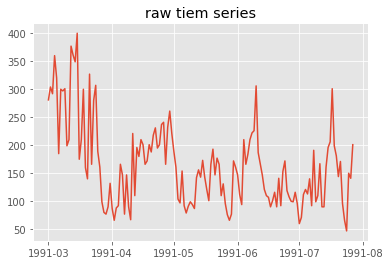

/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


stochastic score
+---------------------+----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
|         adf         |        pvalue        | usedlag | nobs |                                   critical_value                                  |       icbest       |
+---------------------+----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
| -3.7642778196383455 | 0.003294690380296773 |    11   | 137  | {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603} | 1405.3846604574503 |
+---------------------+----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+


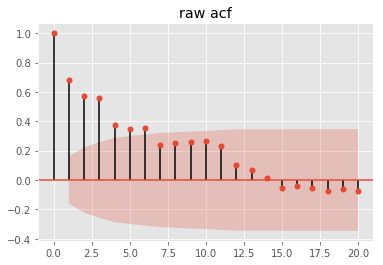

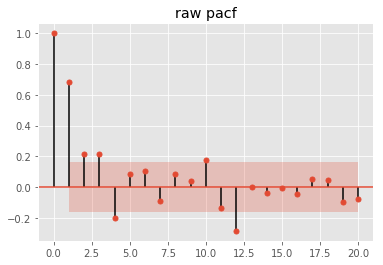

In [104]:
# 展示数据检验

# 平稳性检验
adf, pvalue1, critical_values = adf_val(ts_data, 'raw tiem series', 'raw acf', 'raw pacf')

In [105]:
# 白噪声检验
pvalue2 = acorr_val(ts_data)

stationarity score
+---------------+------------------+
|    lbvalue    |      pvalue      |
+---------------+------------------+
| [70.22300033] | [5.29652707e-17] |
+---------------+------------------+


In [107]:
# 创建用于区分是否进行平稳性处理的规则
rule1 = (adf < critical_values['1%'] and adf < critical_values['5%'] and adf <  critical_values['10%'] and pvalue1 < 0.01)
rule2 = (pvalue2[0,] < 0.05)

print(rule1, rule2)

True True


In [108]:
# 对时间序列做平稳性处理
log_n, ts_data  = get_best_log(ts_data, max_log=5, rule1=rule1, rule2=rule2)

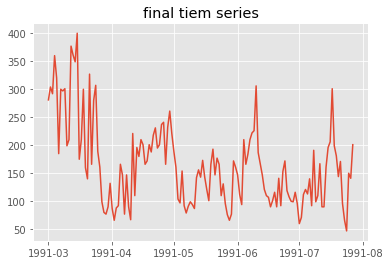

/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


stochastic score
+---------------------+----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
|         adf         |        pvalue        | usedlag | nobs |                                   critical_value                                  |       icbest       |
+---------------------+----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
| -3.7642778196383455 | 0.003294690380296773 |    11   | 137  | {'1%': -3.479007355368944, '5%': -2.8828782366015093, '10%': -2.5781488587564603} | 1405.3846604574503 |
+---------------------+----------------------+---------+------+-----------------------------------------------------------------------------------+--------------------+
stationarity score
+---------------+------------------+
|    lbvalue    |      pvalue      |
+---------------+------------------+
| [70.22

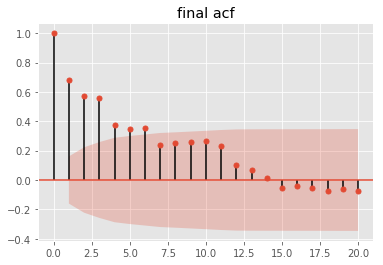

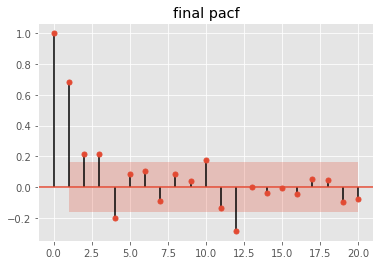

In [110]:
# 再次进行检验
adf, pvalue1, critical_values = adf_val(ts_data, 'final tiem series', 'final acf', 'final pacf')
# 白噪声检验
pvalue2 = acorr_val(ts_data)

In [113]:
# 训练最佳ARMA模型并输出相关参数和结果
model_arma = arma_fit(ts_data)

/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No fre

each p/q training recored
        p     q          aic          bic         hqic
0     0.0   0.0  1712.839862  1718.847755  1715.280770
1     0.0   1.0  1653.446702  1662.458541  1657.108063
2     0.0   2.0  1648.868523  1660.884308  1653.750338
3     0.0   3.0  1618.676555  1633.696287  1624.778824
4     0.0   4.0  1619.720071  1637.743748  1627.042793
5     0.0   5.0  1619.720071  1637.743748  1627.042793
6     0.0   6.0  1601.914727  1625.946297  1611.678357
7     0.0   7.0  1603.490230  1630.525746  1614.474313
8     0.0   8.0  1603.310918  1633.350381  1615.515455
9     0.0   9.0  1605.309821  1638.353230  1618.734812
10    0.0  10.0  1605.309821  1638.353230  1618.734812
11    0.0  11.0  1605.309821  1638.353230  1618.734812
12    0.0  12.0  1605.309821  1638.353230  1618.734812
13    0.0  13.0  1605.309821  1638.353230  1618.734812
14    0.0  14.0  1605.309821  1638.353230  1618.734812
15    1.0   0.0  1607.860643  1616.852280  1611.513924
16    1.0   1.0  1597.519474  1609.5083

/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/Robin/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


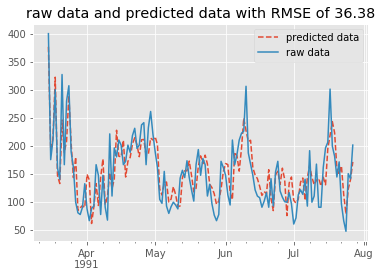

In [114]:
# 模型训练和效果预估
ts_data = train_test(model_arma, ts_data, log_n, rule1=rule1, rule2 = rule2)

-------------predict data-------------
1991-07-28    180.327154
1991-07-29    163.122025
1991-07-30    154.894728
1991-07-31    176.307991
1991-08-01    143.935861
1991-08-02    122.711899
Freq: D, dtype: float64


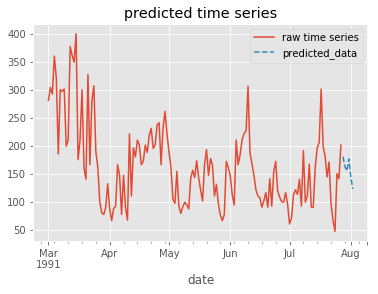

In [115]:
# 设置预测开始、结束索引
start = '1991-07-28'
end = '1991-08-02'
predict_data(model_arma, ts_data, log_n, start, end, rule1 = rule1, rule2 = rule2)

**相关术语**

* 时间序列数据的平稳性：平稳性是做时间序列分析的前提条件，所谓平稳通俗理解就是数据没有随着时间呈现明显的趋势和规律，例如剧烈波动、递增、递减等，而是相对均匀且随机地分布在均值附近。

* 白噪声检验：也被称为随机性检验，用于检验时间序列的各项数据值之间是否具有任何相关关系，白噪声分布是应用实践序列分析的前提。